In [0]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='gathering'></a>
### récupérer les données en utilisant spark sql

In [0]:
sparkdf = spark.sql("select *  from baywheels_table")
df_baywheels = sparkdf.toPandas()

<a id='assessing'></a>
### visualiser les informations sur les données

In [0]:
# Visualize info from dataset
df_baywheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 14 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 150102 non-null int32 
 1 start_time 150102 non-null object 
 2 end_time 150102 non-null object 
 3 start_station_id 129083 non-null float64
 4 start_station_name 129087 non-null object 
 5 start_station_latitude 150102 non-null float64
 6 start_station_longitude 150102 non-null float64
 7 end_station_id 128755 non-null float64
 8 end_station_name 128757 non-null object 
 9 end_station_latitude 150102 non-null float64
 10 end_station_longitude 150102 non-null float64
 11 bike_id 150102 non-null int32 
 12 user_type 150102 non-null object 
 13 rental_access_method 27681 non-null object 
dtypes: float64(6), int32(2), object(6)
memory usage: 14.9+ MB

In [0]:
# Visualize the first five rows
df_baywheels.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,1599,2019-12-03 09:27:44.8660,2019-12-03 09:54:24.4820,70.0,Central Ave at Fell St,37.773311,-122.444293,81.0,Berry St at 4th St,37.775880,-122.393170,118,Customer,None
1,739,2019-12-03 09:42:00.6700,2019-12-03 09:54:20.3080,22.0,Howard St at Beale St,37.789756,-122.394643,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,10719,Subscriber,None
2,1540,2019-12-03 09:28:39.0340,2019-12-03 09:54:19.3000,134.0,Valencia St at 24th St,37.752428,-122.420628,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,113,Subscriber,None
3,737,2019-12-03 09:41:59.5520,2019-12-03 09:54:16.5980,22.0,Howard St at Beale St,37.789756,-122.394643,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,9916,Customer,None
4,1057,2019-12-03 09:36:39.1730,2019-12-03 09:54:16.2240,16.0,Steuart St at Market St,37.794130,-122.394430,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,2461,Subscriber,None


In [0]:
# Verify statistics values
df_baywheels.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,150102.0,790.649752,2925.944647,60.000000,359.000000,570.000000,886.000000,912110.000000
start_station_id,129083.0,166.216884,139.504738,3.000000,52.000000,116.000000,266.000000,498.000000
start_station_latitude,150102.0,37.734527,0.149011,37.268049,37.764802,37.776664,37.792251,37.880222
start_station_longitude,150102.0,-122.324810,0.167988,-122.513816,-122.415674,-122.398279,-122.275698,-121.813425
end_station_id,128755.0,157.234841,137.800047,3.000000,38.000000,109.000000,252.000000,498.000000
end_station_latitude,150102.0,37.729180,0.480472,0.000000,37.765026,37.777053,37.794130,37.880222
end_station_longitude,150102.0,-122.305736,1.490201,-122.513824,-122.411726,-122.397086,-122.279352,0.000000
bike_id,150102.0,98479.011719,217369.156650,12.000000,9496.000000,11025.000000,12727.000000,999941.000000


In [0]:
# Verify values nulls
df_baywheels.isnull().sum()

Out[223]: duration_sec 0
start_time 0
end_time 0
start_station_id 21019
start_station_name 21015
start_station_latitude 0
start_station_longitude 0
end_station_id 21347
end_station_name 21345
end_station_latitude 0
end_station_longitude 0
bike_id 0
user_type 0
rental_access_method 122421
dtype: int64

In [0]:
# Verify values nulls in percent
(df_baywheels.isnull().sum() / df_baywheels.shape[0]) * 100

Out[224]: duration_sec 0.000000
start_time 0.000000
end_time 0.000000
start_station_id 14.003145
start_station_name 14.000480
start_station_latitude 0.000000
start_station_longitude 0.000000
end_station_id 14.221663
end_station_name 14.220330
end_station_latitude 0.000000
end_station_longitude 0.000000
bike_id 0.000000
user_type 0.000000
rental_access_method 81.558540
dtype: float64

In [0]:
# Verify values in column
df_baywheels['start_station_id'].value_counts()

Out[225]: 30.0 3134
58.0 2452
81.0 2347
22.0 1884
16.0 1686
 ... 
298.0 7
228.0 6
444.0 3
224.0 2
421.0 1
Name: start_station_id, Length: 421, dtype: int64

In [0]:
# Verify values in column
df_baywheels['start_station_name'].value_counts()

Out[226]: San Francisco Caltrain (Townsend St at 4th St) 3134
Market St at 10th St 2452
Berry St at 4th St 2347
Howard St at Beale St 1884
Steuart St at Market St 1686
 ... 
Foothill Blvd at Harrington Ave 6
Jackson St at N 1st St 4
Mercado Way at Sierra Rd 3
21st Ave at International Blvd 2
23rd St at Taylor St 1
Name: start_station_name, Length: 422, dtype: int64

In [0]:
# Verify values in column
df_baywheels['end_station_id'].value_counts()

Out[227]: 30.0 4846
21.0 2744
81.0 2438
58.0 2361
3.0 2262
 ... 
224.0 4
298.0 4
444.0 4
421.0 1
420.0 1
Name: end_station_id, Length: 423, dtype: int64

In [0]:
# Verify values in column
df_baywheels['end_station_name'].value_counts()

Out[228]: San Francisco Caltrain (Townsend St at 4th St) 4846
Montgomery St BART Station (Market St at 2nd St) 2744
Berry St at 4th St 2438
Market St at 10th St 2361
Powell St BART Station (Market St at 4th St) 2262
 ... 
Oak St at 1st St 4
SF Test Station 1
Jackson St at N 1st St 1
23rd St at Taylor St 1
N 3rd St at E Taylor St 1
Name: end_station_name, Length: 425, dtype: int64

In [0]:
# Verify values in column
df_baywheels['user_type'].value_counts()

Out[229]: Subscriber 78233
Customer 71869
Name: user_type, dtype: int64

In [0]:
# Verify values in column
df_baywheels['bike_id'].value_counts()

Out[230]: 483611 107
615745 105
259346 91
282535 90
679782 89
 ... 
345 1
9224 1
724 1
996963 1
2975 1
Name: bike_id, Length: 5905, dtype: int64

In [0]:
# Verify values in column
df_baywheels['rental_access_method'].value_counts()

Out[231]: app 23994
clipper 3687
Name: rental_access_method, dtype: int64

In [0]:
df_baywheels['duration_sec'].describe(percentiles=[.98])

Out[232]: count 150102.000000
mean 790.649752
std 2925.944647
min 60.000000
50% 570.000000
98% 2557.000000
max 912110.000000
Name: duration_sec, dtype: float64

### Problème de Qualité des données 
- Types de données erronés `start_time`, `end_time` et `user_type`.
- Valeurs nulles dans les colonnes `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name` et `rental_access_method`.

### Problèmes de propreté des données
- Des colonnes individuelles sont manquantes pou **hour**, **weekday name** et **duration in minute**.
- les données ne sont pas ordonnées par date.
- Colonnes qui ne seront pas utilisées.

<a id='cleaning'></a>
## Nettoyage des données

In [0]:
# Create copy of dataset
df_baywheels_clean = df_baywheels.copy()

##### - suppression des colonnes qui ne seront pas utilisées : "start_station_id", "end_station_id", "start_station_latitude", "start_station_longitude",           "end_station_latitude", "end_station_longitude" and "bike_id"

In [0]:
# Drop columns 'start_station_id', 'end_station_id',"start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude" and "bike_id"
df_baywheels_clean = df_baywheels_clean.drop([ 'start_station_id', 'end_station_id','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id'], axis=1)

##### - suppression de la colonne "rental_access_method" car elle contient 81% des null.

In [0]:
# Drop column "rental_access_method"
df_baywheels_clean = df_baywheels_clean.drop(['rental_access_method'], axis=1)

###### suppression des enregistrement qui contiennent des valeurs null pour les colonnes : 'start_station_name' et 'end_station_name'

In [0]:
# Drop rows in start_station_name and end_station_name
df_baywheels_clean = df_baywheels_clean[~((df_baywheels_clean['start_station_name'].isnull()) | df_baywheels_clean['end_station_name'].isnull())]

##### Test

In [0]:
# Verify nulls values
df_baywheels_clean.isnull().sum()

Out[237]: duration_sec 0
start_time 0
end_time 0
start_station_name 0
end_station_name 0
user_type 0
dtype: int64

In [0]:
# Verify info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125638 entries, 0 to 149779
Data columns (total 6 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 125638 non-null int32 
 1 start_time 125638 non-null object
 2 end_time 125638 non-null object
 3 start_station_name 125638 non-null object
 4 end_station_name 125638 non-null object
 5 user_type 125638 non-null object
dtypes: int32(1), object(5)
memory usage: 6.2+ MB

#### attribuer le type correcte pour les colonnes :  `start_time`, `end_time` , `user_type` .

In [0]:
# Set datatype in start_time and end_time to datetime 
df_baywheels_clean['start_time'] = pd.to_datetime(df_baywheels_clean['start_time'])
df_baywheels_clean['end_time'] = pd.to_datetime(df_baywheels_clean['end_time'])

In [0]:
# Set "user_type" as category type
df_baywheels_clean['user_type'] = df_baywheels_clean['user_type'].astype('category')

##### Test

In [0]:
# Verify info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125638 entries, 0 to 149779
Data columns (total 6 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 125638 non-null int32 
 1 start_time 125638 non-null datetime64[ns]
 2 end_time 125638 non-null datetime64[ns]
 3 start_station_name 125638 non-null object 
 4 end_station_name 125638 non-null object 
 5 user_type 125638 non-null category 
dtypes: category(1), datetime64[ns](2), int32(1), object(2)
memory usage: 5.4+ MB

#### - Création des colonnes intermédiaires pour mieux analyser nos données : `start_time_hour`, `end_time_hour`, `time_day_of_week` et `duration_minute`

In [0]:
# Create columns "start_time_hour", "end_time_hour", "time_day_of_week", "duration_minute" and "time_week_type"
df_baywheels_clean['start_time_hour'] = df_baywheels_clean['start_time'].dt.hour # Get hour
df_baywheels_clean['end_time_hour'] = df_baywheels_clean['end_time'].dt.hour # Get hour
df_baywheels_clean['time_day_of_week'] = df_baywheels_clean['start_time'].dt.day_name() # Get day of week name
df_baywheels_clean['duration_minute'] = df_baywheels_clean['duration_sec'].apply(lambda x: round(x / 60, 2)) # Transform second to minute

In [0]:
# Set "time_week_type" as category type and ordered
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_classes = pd.api.types.CategoricalDtype(ordered = True, categories = day_of_week)
df_baywheels_clean['time_day_of_week'] = df_baywheels_clean['time_day_of_week'].astype(day_of_week_classes)

##### Test

In [0]:
# Verify info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125638 entries, 0 to 149779
Data columns (total 11 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 125638 non-null int32 
 1 start_time 125638 non-null datetime64[ns]
 2 end_time 125638 non-null datetime64[ns]
 3 start_station_name 125638 non-null object 
 4 end_station_name 125638 non-null object 
 5 user_type 125638 non-null category 
 6 start_time_hour 125638 non-null int64 
 7 end_time_hour 125638 non-null int64 
 8 time_day_of_week 125638 non-null category 
 9 time_month 125638 non-null object 
 10 duration_minute 125638 non-null float64 
dtypes: category(2), datetime64[ns](2), float64(1), int32(1), int64(2), object(3)
memory usage: 9.3+ MB

In [0]:
# Verify values in column
df_baywheels_clean['start_time_hour'].value_counts()

Out[245]: 8 15475
17 13969
9 12335
16 10141
18 9999
7 7185
15 6483
10 6155
19 6028
12 5620
11 5564
13 5454
14 5389
20 3871
21 2788
6 2698
22 2293
23 1395
0 835
5 762
1 524
2 323
4 216
3 136
Name: start_time_hour, dtype: int64

In [0]:
# Verify values in column
df_baywheels_clean['end_time_hour'].value_counts()

Out[246]: 8 14083
9 13837
17 13734
18 10932
16 9599
19 6725
10 6701
7 6085
15 6014
12 5608
11 5430
14 5428
13 5398
20 4112
21 2972
22 2441
6 2196
23 1495
0 921
5 625
1 557
2 394
4 209
3 142
Name: end_time_hour, dtype: int64

In [0]:
# Verify values in column
df_baywheels_clean['time_day_of_week'].value_counts()

Out[247]: Monday 24625
Tuesday 23879
Thursday 21426
Friday 19876
Wednesday 16546
Sunday 9704
Saturday 9582
Name: time_day_of_week, dtype: int64

In [0]:
# Verify values in column
df_baywheels_clean['time_month'].value_counts()

Out[248]: December 125638
Name: time_month, dtype: int64

In [0]:
# Verify values in column
df_baywheels_clean['duration_minute'].value_counts()

Out[249]: 5.27 189
6.32 189
6.07 185
6.53 184
6.33 184
 ... 
112.70 1
300.28 1
87.90 1
221.45 1
376.22 1
Name: duration_minute, Length: 4198, dtype: int64

#### - Ordonner les données par date

In [0]:
# Sorted dateset by column "start_time"
df_baywheels_clean = df_baywheels_clean.sort_values(by=['start_time']).reset_index(drop=True)

##### Test

In [0]:
# Verify dataset
df_baywheels_clean

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,start_time_hour,end_time_hour,time_day_of_week,time_month,duration_minute
0,209,2019-12-01 00:00:25.336,2019-12-01 00:03:54.836,Fruitvale BART Station,Fruitvale Ave at International Blvd,Customer,0,0,Sunday,December,3.48
1,682,2019-12-01 00:03:46.689,2019-12-01 00:15:09.352,22nd St Caltrain Station,17th St at Valencia St,Customer,0,0,Sunday,December,11.37
2,720,2019-12-01 00:07:44.840,2019-12-01 00:19:45.008,Valencia St at 21st St,Randall St at Chenery St,Customer,0,0,Sunday,December,12.00
3,305,2019-12-01 00:09:48.562,2019-12-01 00:14:53.578,South San Jose State (7th St at Humboldt St),5th St at Virginia St,Subscriber,0,0,Sunday,December,5.08
4,831,2019-12-01 00:13:39.222,2019-12-01 00:27:31.170,Webster St at 19th St,Jack London Square,Subscriber,0,0,Sunday,December,13.85
...,...,...,...,...,...,...,...,...,...,...,...
125633,1275,2019-12-31 23:56:05.939,2020-01-01 00:17:21.935,Cruise Terminal at Pier 27,Embarcadero BART Station (Beale St at Market St),Customer,23,0,Tuesday,December,21.25
125634,782,2019-12-31 23:56:34.462,2020-01-01 00:09:36.705,The Embarcadero at Steuart St,The Embarcadero at Steuart St,Customer,23,0,Tuesday,December,13.03
125635,781,2019-12-31 23:56:40.324,2020-01-01 00:09:41.545,The Embarcadero at Steuart St,The Embarcadero at Steuart St,Customer,23,0,Tuesday,December,13.02
125636,185,2019-12-31 23:57:01.551,2020-01-01 00:00:07.494,San Francisco Public Library (Grove St at Hyde...,Market St at Franklin St,Customer,23,0,Tuesday,December,3.08


In [0]:
# Verify Info
df_baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125638 entries, 0 to 125637
Data columns (total 11 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 125638 non-null int32 
 1 start_time 125638 non-null datetime64[ns]
 2 end_time 125638 non-null datetime64[ns]
 3 start_station_name 125638 non-null object 
 4 end_station_name 125638 non-null object 
 5 user_type 125638 non-null category 
 6 start_time_hour 125638 non-null int64 
 7 end_time_hour 125638 non-null int64 
 8 time_day_of_week 125638 non-null category 
 9 time_month 125638 non-null object 
 10 duration_minute 125638 non-null float64 
dtypes: category(2), datetime64[ns](2), float64(1), int32(1), int64(2), object(3)
memory usage: 8.4+ MB

### Dataset finale

In [0]:
# Copy de final dataset
df_baywheels_final = df_baywheels_clean.copy()

<a id='analyzing'></a>
## Analyse des données

## Exploration univariée

**On s'intéresse à la variable : `duration_minute`.**

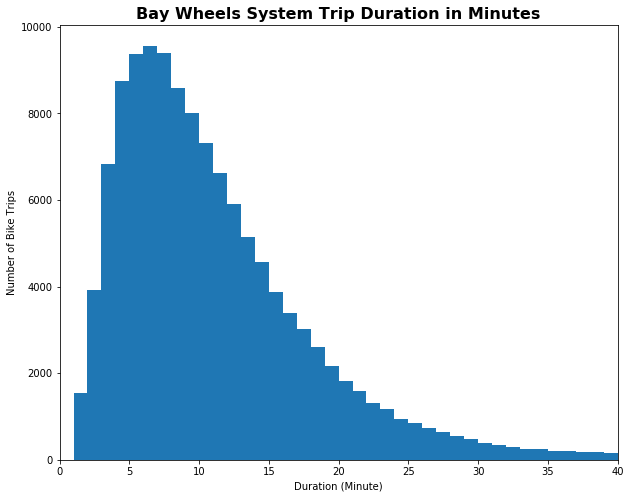

In [0]:
# Duration of the bike rides in minutes
plt.figure(figsize=(10, 8))
binsize = 1
bins = np.arange(0, df_baywheels_final['duration_minute'].max() + binsize, binsize)

plt.hist(data = df_baywheels_final, x = 'duration_minute', bins = bins);

plt.title("Bay Wheels System Trip Duration in Minutes", fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minute)')
plt.ylabel('Number of Bike Trips')
plt.xlim([0,40]);

Nous avons observé qu'il formait un graphique à asymétrie positive, où la majorité des trajets a une durée comprise entre 5 et 14 minutes.

**Maintenant, on regarde la distribution des fonctionnalités datetime**

In [0]:
# Get palette color
base_color = sb.color_palette()[0]

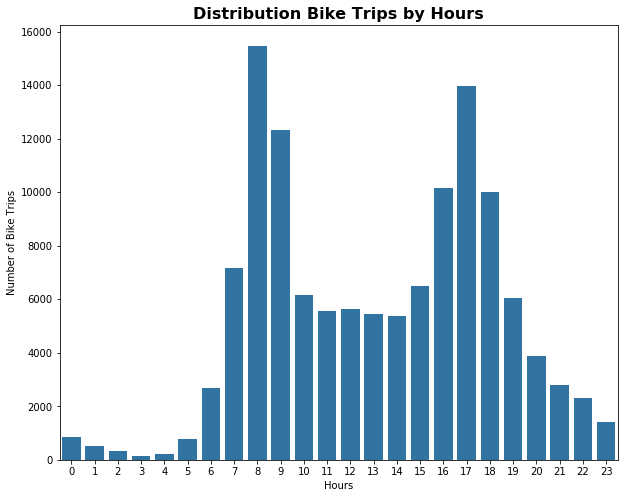

In [0]:
# Plot distribution by "start_time_hour"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'start_time_hour', color = base_color);
plt.title("Distribution Bike Trips by Hours", fontsize=16, fontweight='bold')
plt.xlabel('Hours')
plt.ylabel('Number of Bike Trips');

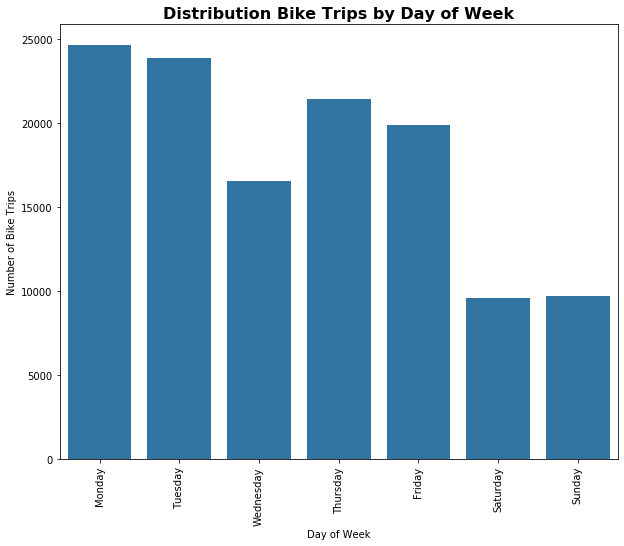

In [0]:
# Plot distribution by "time_day_of_week"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'time_day_of_week', color = base_color);
plt.xticks(rotation=90)
plt.title("Distribution Bike Trips by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bike Trips');

Dans le graphique des variables temporelles, certaines choses ressortent :
- Lorsque nous regardons les heures de déplacement, nous constatons un pic de déplacements entre 7 et 9 et un autre pic entre 16 et 18;
- Lorsque nous regardons les jours de la semaine, nous remarquons que du lundi au vendredi, nous avons la plupart des déplacements avec des pics le lundi et le mardi et les minimums pendant le week-end.

**Maintenant, on regarde la distribution de la fonctionnalité User**

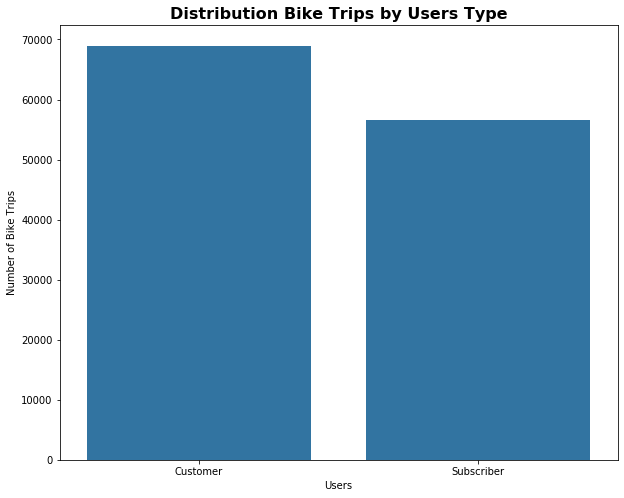

In [0]:
# Plot distribution by "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'user_type', color = base_color);
plt.title("Distribution Bike Trips by Users Type", fontsize=16, fontweight='bold')
plt.xlabel('Users')
plt.ylabel('Number of Bike Trips');

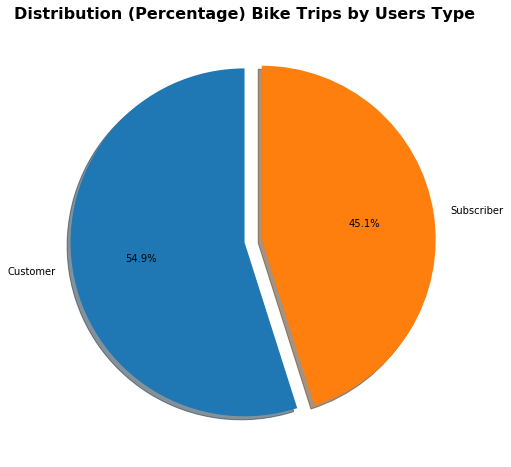

In [0]:
# Pie plot distribution by "user_type"
plt.figure(figsize=(10, 8))
plt.title("Distribution (Percentage) Bike Trips by Users Type", fontsize=16, fontweight='bold')
labels = ['Customer', 'Subscriber']
data = [(df_baywheels_final['user_type'].value_counts(normalize=True) * 100)['Customer'], (df_baywheels_final['user_type'].value_counts(normalize=True) * 100)['Subscriber']]

plt.pie(data, explode=(0, 0.1), labels = labels, autopct='%1.1f%%', shadow=True, startangle=90);

Nous voyons ici que plus de 54,4% des utilisateurs qui utilisent les services sont des clients et 45.1 sont des abonnés.

### conclusion : 
Nous constatons que la majorité des déplacements ont une durée comprise entre 5 et 14 minutes et que, du lundi au vendredi, nous avons la majorité des déplacements, principalement aux heures où les personnes se déplacent pour commencer ou quitter leur travail ou leur école (de 7h à 9h le matin et de 16H à 18h à la fin de journée).

## Exploration à deux variables

**Commençons par comparer la durée des trajets par les autres caractéristiques.**

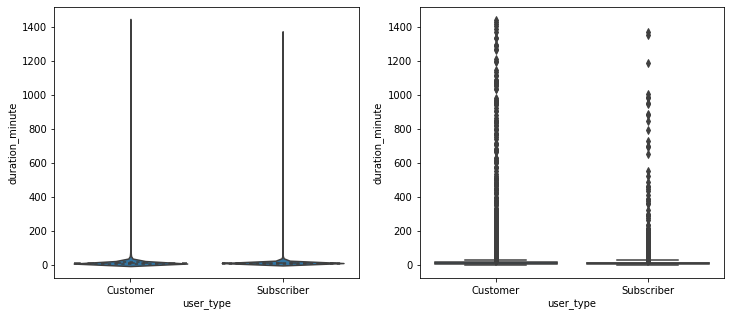

In [0]:
# Bivariate plots of "duration_minute" vs. "user_type"
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_baywheels_final, x = 'user_type', y = 'duration_minute', color = base_color, inner='quartile')

plt.subplot(1, 2, 2)
sb.boxplot(data = df_baywheels_final, x = 'user_type', y = 'duration_minute', color = base_color)

plt.ylim(ax1.get_ylim());


Nous pouvons constater que les utilisateurs "clients" ont tendance à faire des trajets plus longs que les utilisateurs "abonnés".

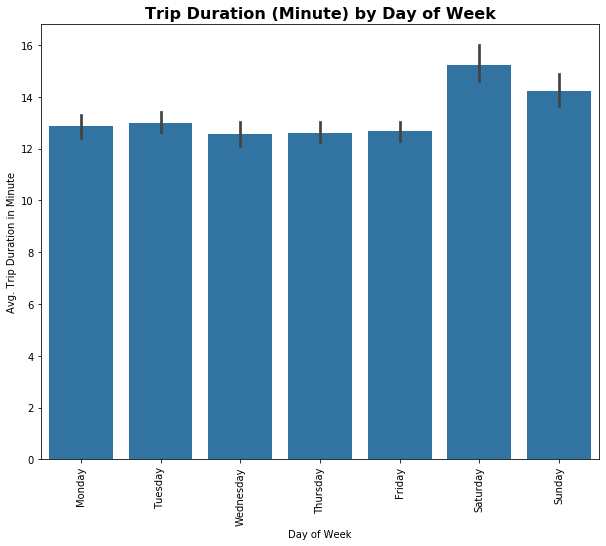

In [0]:
# Bivariate plots of "time_day_of_week" vs "duration_minute"
plt.figure(figsize=(10, 8))
sb.barplot(data=df_baywheels_final, x='time_day_of_week', y='duration_minute', color=base_color);
plt.xticks(rotation=90)
plt.title("Trip Duration (Minute) by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

Nous avons observé que pendant les week-ends, les gens ont tendance à faire des voyages plus longs..

**Ensuite on compare le type d'utilisateur avec les autres caractéristiques.**

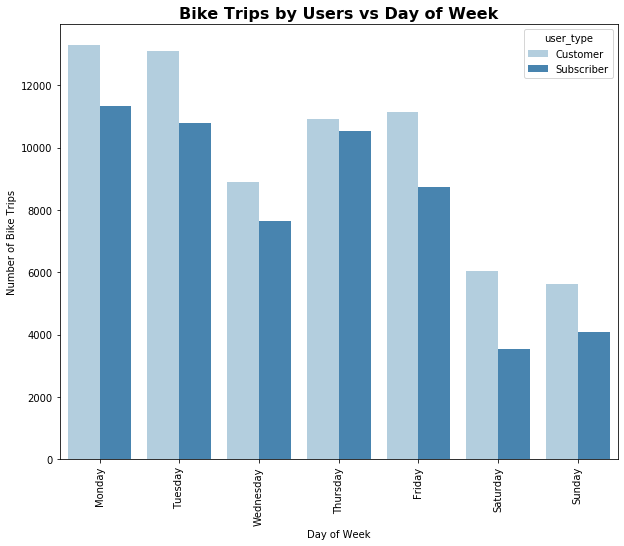

In [0]:
# Bivariate plots of "time_day_of_week" vs "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'time_day_of_week', hue = 'user_type', palette = 'Blues')
plt.xticks(rotation=90)
plt.title("Bike Trips by Users vs Day of Week", fontsize=16, fontweight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Number of Bike Trips');

nous constatons une forte baisse des abonnés pendant les week-ends, tandis que le client utilisateur subit une baisse moins importante.

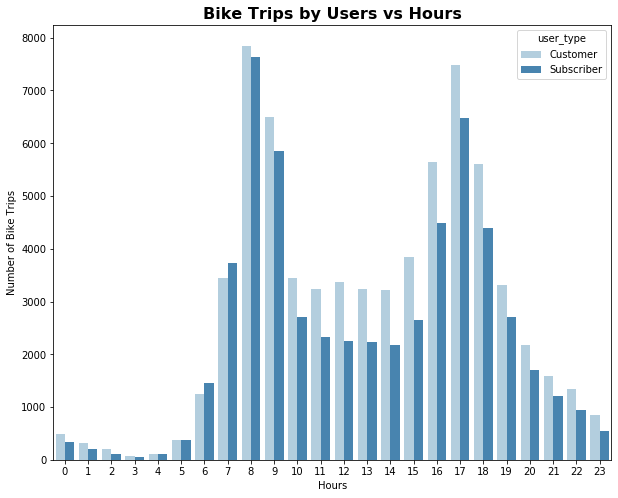

In [0]:
# Bivariate plots of "time_day_of_week" vs "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = df_baywheels_final, x = 'start_time_hour', hue = 'user_type', palette = 'Blues')
plt.title("Bike Trips by Users vs Hours", fontsize=16, fontweight='bold')
plt.xlabel('Hours');
plt.ylabel('Number of Bike Trips');

Là encore, on constate une tendance à l'augmentation des déplacements entre 8 et 9 heures et entre 17 et 18 heures, principalement pour les usagers "clients". Les usagers "Abonnés" suivent une tendance plus discrète.

## Exploration multivariable

**Je vais comparer la durée moyenne des trajets en minutes, le type d'utilisateur et les autres caractéristiques.**

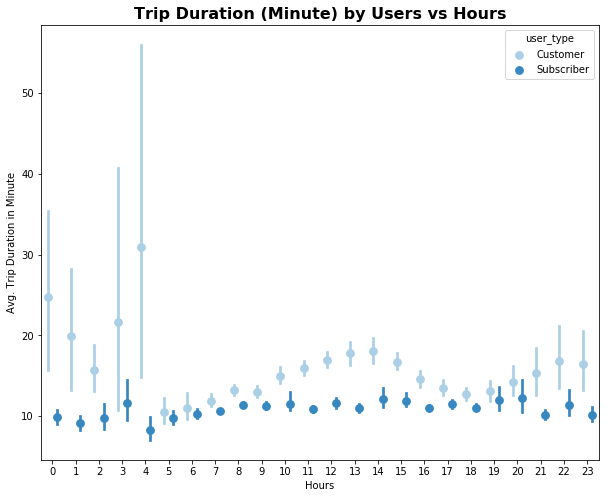

In [0]:
# Multivariate plots of Avg. Duration (minute) by "start_time_hour" vs "user_type"
fig = plt.figure(figsize=(10, 8))
ax = sb.pointplot(data = df_baywheels_final, x = 'start_time_hour', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration (Minute) by Users vs Hours', fontsize=16, fontweight='bold')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xlabel('Hours');
ax.set_yticklabels([],minor = True)
plt.show();

Nous avons remarqué que la durée moyenne d'un voyage par heure, place le "Client" avec une augmentation du temps pendant les heures du matin entre 00h et 4h où il n' y a pas de moyen de transport dans ces heurs, tandis que l'"Abonné" a peu de variation pendant la journée.

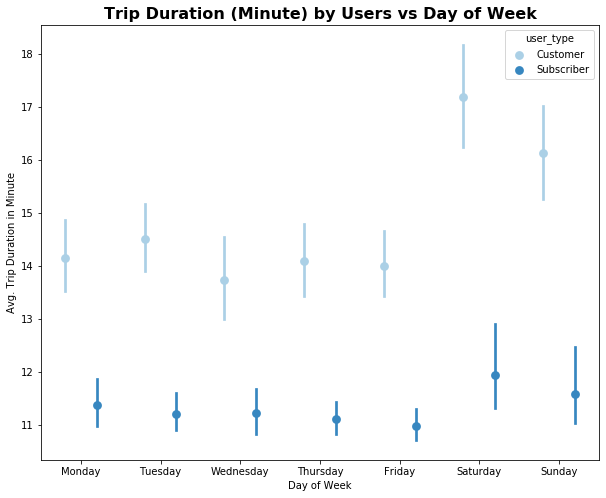

In [0]:
# Multivariate plots of Avg. Duration (minute) by "time_day_of_week" vs "user_type"
fig = plt.figure(figsize=(10, 8))
ax = sb.pointplot(data = df_baywheels_final, x = 'time_day_of_week', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration (Minute) by Users vs Day of Week', fontsize=16, fontweight='bold')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xlabel('Day of Week');
ax.set_yticklabels([],minor = True)
plt.show();

Nous avons également observé que le "Client" consacre plus de temps aux voyages pendant le week-end, alors que l'"Abonné" a peu de volatilité pour le week-end.

### conclusion : 
Nous avons observé que la durée moyenne des trajets des utilisateurs "clients" est plus élevée que celle des utilisateurs "abonnés", ce qui montre que le "client" utilise davantage le service pour ses loisirs, tandis que l'"abonné" l'utilise davantage pour se déplacer entre le domicile/l'école et le travail.